<h1 style="text-align:center;">TỔNG QUAN ĐỀ TÀI </h1>
<p > 
<ul style="font-size:120%;">
 <li> Phân tích dữ liệu covid từ 22/1/2020 đến 31/8/2022 dưa vào dữ liệu của Johns Hopkins CSSSE .</li> 
 <li> Sử dụng các biểu đồ để trực quan hóa dữ liệu. </li>
 <li> Phân ra các vùng châu lục </li>
 </p>

# I. Import những thư viện cần thiết

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# II. Load dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Dữ liệu global
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

#  III. TRỰC QUAN HÓA DỮ LIỆU

## 3.1 Khai phá dữ liệu

In [4]:
#Lấy dữ liệu theo ngày:
confirmed = confirmed_df.iloc[:,4:]
deaths = deaths_df.iloc[:,4:]
recoveries = recoveries_df.iloc[:,4:]
covid_dict = {'Confirmed':confirmed,'Deaths':deaths,'Recoveries':recoveries}
#Lấy dữ liệu ngày và cột:
dates = confirmed.keys()
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0]) #Điều chỉnh ngày theo số tới.
adjusted_dates = adjusted_dates[:961]
cols = confirmed_df.keys()


#Tính tổng và tỉ lệ ca nhiễm, tử vong và phục hồi:
total_cases = confirmed.iloc[:,-1].sum()
total_deaths = deaths.iloc[:,-1].sum()
mortality_rate = round(total_deaths/total_cases*100,2)
total_recovered = recoveries.iloc[:,-1].sum()
recovery_rate = round(total_recovered/total_cases*100,2)


In [51]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,193004,193250,193520,193520,193912,194163,194355,194614,195012,195298
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,329017,329352,329615,329862,330062,330193,330221,330283,330516,330687
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270272,270304,270359,270405,270426,270443,270461,270476,270489,270507
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46027,46027,46027,46027,46027,46027,46027,46027,46113,46113
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


In [52]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7777,7777,7778,7778,7780,7782,7783,7783,7785,7786
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3582,3582,3583,3583,3583,3583,3583,3583,3584,3584
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6879,6879,6879,6879,6879
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,155,155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [53]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/30/22,8/31/22,9/1/22,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Tổng ca đã nhiễm: ", total_cases)
print("Tổng ca tử vong: ", total_deaths)
print("Tổng ca phục hồi: ", total_recovered)
print('Tỉ lệ tử vong: %.2f'%mortality_rate,'%')


Tổng ca đã nhiễm:  607456761
Tổng ca tử vong:  6510329
Tổng ca phục hồi:  0
Tỉ lệ tử vong: 1.07 %


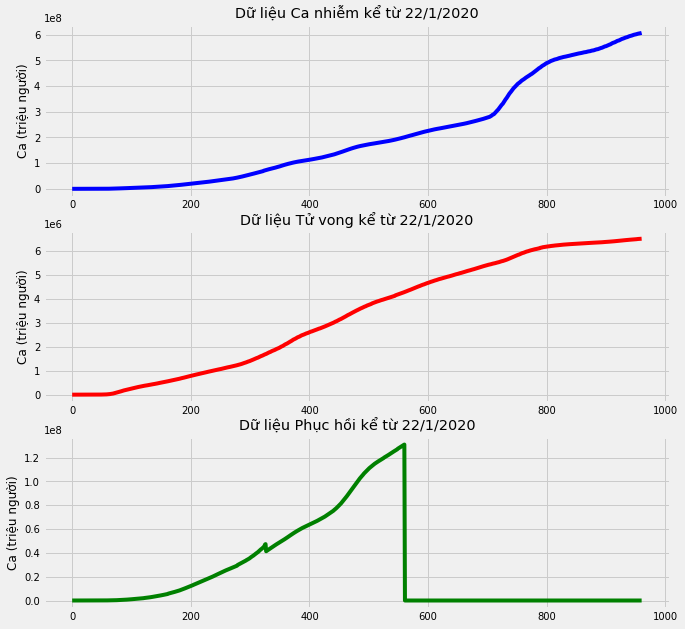

In [55]:
#Trực quan hóa dữ liệu:
def plot_line(data,name,day,color):
    plt.plot(day,data.sum(axis=0),color=color)
    plt.title('Dữ liệu ' +str(name)+ ' kể từ 22/1/2020')
    plt.ylabel('Ca (triệu người)')
plt.rcParams.update({'font.size':10})
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plot_line(confirmed,'Ca nhiễm',adjusted_dates,'blue')
plt.subplot(3,1,2)
plot_line(deaths,'Tử vong',adjusted_dates,'red')
plt.subplot(3,1,3)
plot_line(recoveries,'Phục hồi',adjusted_dates,'green')

### Nhận xét:
- Ta có thể thấy rằng, dữ liệu Tử vong và Phục hồi đẩy đủ.
- Với bộ dữ liệu Ca phục hồi thì ta thấy rằng đến khoảng ngày thứ 500, dữ liệu bị $missing$ (giá trị = 0) 
    => Chỉ phân tích bộ dữ liệu "Tử vong" và "Ca nhiễm"

## 3.2) Trực quan hóa dữ liệu ca nhiễm và ca tử vong theo ngày từ 22/1/2020 ->31/8/2022

Text(500, 20703, 'Đỉnh tử vong\nNgày: [544]\nCa tử vong: 20703')

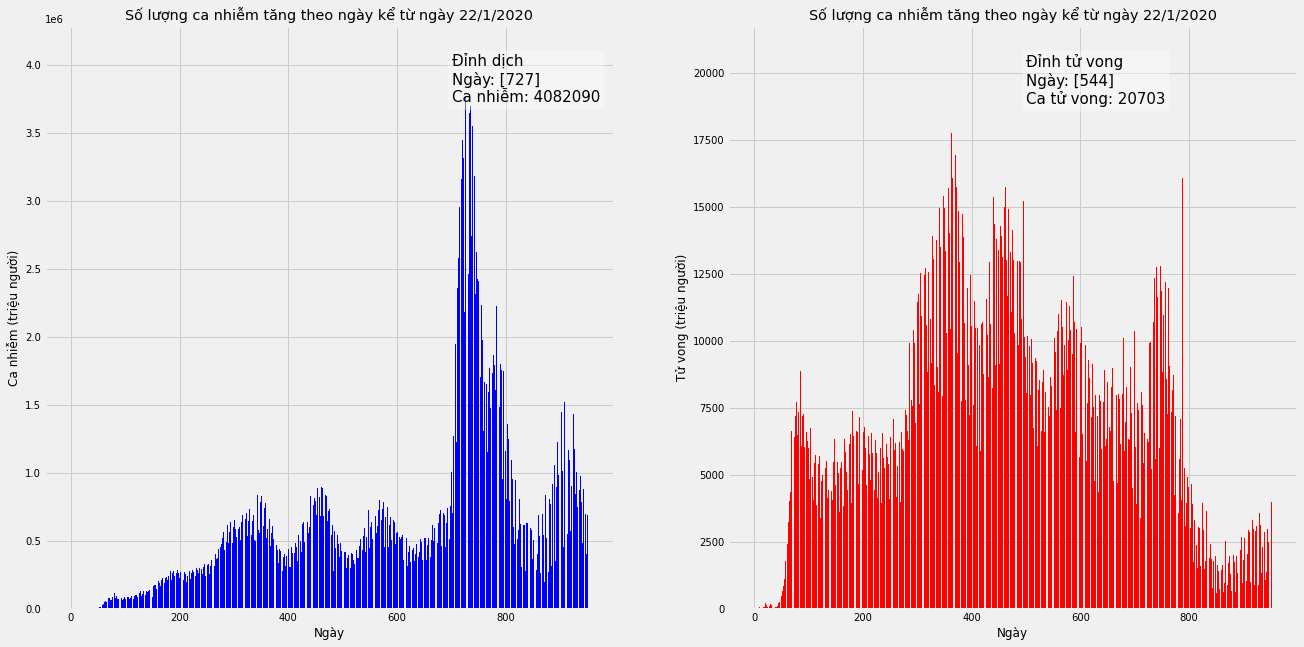

In [56]:
#Ca theo ngày = (ngày sau) - (ngày trước)
confirmed_global = confirmed.iloc[:,:953].sum(axis=0)
deaths_global = deaths.iloc[:,:953].sum(axis=0)
confirmed_global_increase =  confirmed_global.to_numpy()[1:] - confirmed_global.to_numpy()[:-1]
deaths_global_increase = deaths_global.to_numpy()[1:] - deaths_global.to_numpy()[:-1]
peak_confirmed = confirmed_global_increase.max() #Ngày có giá trị cao nhất
peak_deaths = deaths_global_increase.max() #Ngày có giá trị cao nhất
#plot ca nhiễm:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.bar(adjusted_dates[:-9],confirmed_global_increase,color='blue')
plt.xlabel('Ngày')
plt.ylabel('Ca nhiễm (triệu người)')
plt.title('Số lượng ca nhiễm tăng theo ngày kể từ ngày 22/1/2020')
plt.text(700,confirmed_global_increase[727], 
        s='Đỉnh dịch\n'+'Ngày: '+str(np.where(confirmed_global_increase == peak_confirmed)[0])+'\n'+'Ca nhiễm: '+str(peak_confirmed),
        fontsize=15, horizontalalignment='left', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.4))
#plot ca tử vong:
plt.subplot(1,2,2)
plt.bar(adjusted_dates[:-9],deaths_global_increase,color='red')
plt.xlabel('Ngày')
plt.ylabel('Tử vong (triệu người)')
plt.title('Số lượng ca nhiễm tăng theo ngày kể từ ngày 22/1/2020')
plt.text(500,deaths_global_increase[544], 
        s='Đỉnh tử vong\n'+'Ngày: '+str(np.where(deaths_global_increase == peak_deaths)[0])+'\n'+'Ca tử vong: '+str(peak_deaths),
        fontsize=15, horizontalalignment='left', verticalalignment='top',bbox=dict(facecolor='white', alpha=0.4))

### Nhận xét:
- Ta có thể thấy ca nhiễm covid của tập confirmed_df thể hiện đầy đủ, với đỉnh dịch là ngày 727.
- Đối với tập deaths_df, ta thấy rằng có xuất hiện giá trị âm => có dữ liệu bị sai hoặc thiếu. (ngày sau < ngày trước)

### 3.3) Tỉ lệ tử vong theo ngày từ 22/1/2020 ->31/8/2022

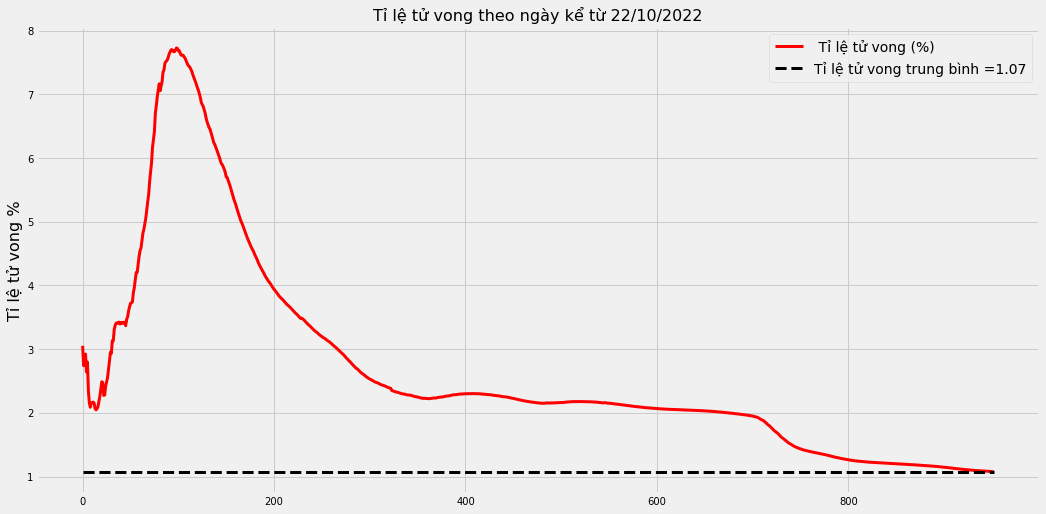

In [65]:
#Insert your code here:
#Tỉ lệ tử vong
mortality_day = deaths.iloc[:,:953].sum(axis=0)/confirmed.iloc[:,:953].sum(axis=0)*100
plt.figure(figsize=(16,8))
plt.plot(adjusted_dates[:-8],mortality_day,color='red',linewidth = 3,label = ' Tỉ lệ tử vong (%)')
plt.plot(adjusted_dates[:-8],[mortality_rate]*len(adjusted_dates[:-8]),color='black',linewidth=3,label='Tỉ lệ tử vong trung bình ='+str(mortality_rate),linestyle='--')
plt.ylabel('Tỉ lệ tử vong %',fontsize = 16)
plt.rcParams.update({'font.size':14})
plt.title('Tỉ lệ tử vong theo ngày kể từ 22/10/2022',fontsize = 16)
plt.axis('tight')
plt.legend();

In [ ]:
print('Ngày có tỉ lệ tử vong cao nhất là: \n',mortality_day[mortality_day== mortality_day.max()])

Ngày có tỉ lệ tử vong cao nhất là: 
 4/29/20    7.728123
dtype: float64


### Nhận xét:
- Ta có thể thấy tỉ lệ tử vong từ những ngày khởi đầu dịch rất cao so với tỉ lệ trung bình tính cho tới thời điểm hiện tại.\
    => Điều đó dẫn đến kết luận rằng vaccine đang hoạt động hiệu quả.

#### 3.4) Trực quan hóa dữ liệu theo từng châu lục

- Phân dữ liệu theo từng châu lục

In [66]:
#Chỉnh các giá trị tên của các châu lục theo kí hiệu của thư viện:
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [67]:
continent1 = []
continent2 = []
continent3 = []
#Add các tên continent (theo 3 bảng conf,death,recoveries) vào các list continent1,2,3 từ list countries

for i in countries:
    k = country_to_continent_code(i)
    continent1.append(k)
for i in countries1:
    k = country_to_continent_code(i)
    continent2.append(k)
for i in countries2:
    k = country_to_continent_code(i)
    continent3.append(k)
confirmed_df.insert(2,'Continent',continent1)
deaths_df.insert(2,'Continent',continent2)


In [68]:
#Group các dữ liệu theo đất nước
confirmed_by_na = confirmed_df.groupby(['Country/Region'])[cols[-1]].sum()
deaths_by_na = deaths_df.groupby(['Country/Region'])[cols[-1]].sum()
dict_nation = {'Confirmed':confirmed_by_na,'Deaths':deaths_by_na}
df_nation = pd.DataFrame(dict_nation)
df_nation['Mortality Rate'] = round(df_nation['Deaths']/df_nation['Confirmed']*100,2)
print(df_nation)

                      Confirmed  Deaths  Mortality Rate
Country/Region                                         
Afghanistan              195298    7786            3.99
Albania                  330687    3584            1.08
Algeria                  270507    6879            2.54
Andorra                   46113     155            0.34
Angola                   102636    1917            1.87
...                         ...     ...             ...
West Bank and Gaza       702591    5706            0.81
Winter Olympics 2022        535       0            0.00
Yemen                     11932    2155           18.06
Zambia                   333180    4017            1.21
Zimbabwe                 256834    5596            2.18

[199 rows x 3 columns]


In [69]:
#Group các bảng theo châu lục (continent):
confirmed_by_con = confirmed_df.groupby(['Continent'])[cols[-1]].sum()
deaths_by_con = deaths_df.groupby(['Continent'])[cols[-1]].sum()
dict_con = {'Confirmed':confirmed_by_con,'Deaths':deaths_by_con}
df_con = pd.DataFrame(dict_con)
df_con['Mortality Rate'] = round(df_con['Deaths']/df_con['Confirmed']*100,2)
print(df_con)

           Confirmed   Deaths  Mortality Rate
Continent                                    
AF          12335240   256605            2.08
AS         180727400  1452582            0.80
EU         224397130  1927769            0.86
NA         112657579  1500648            1.33
OC          12085517    18117            0.15
SA          63637873  1326102            2.08
na           1616022    28506            1.76


In [70]:
#Viết hàm vẽ biểu đồ:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed.columns[5]+" - "+deaths.columns[-2]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        

Biểu đồ đường:

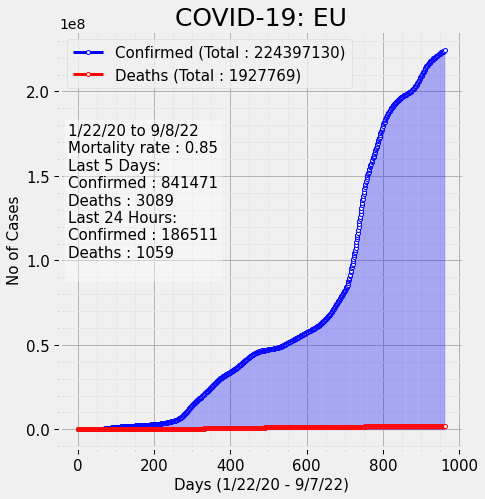

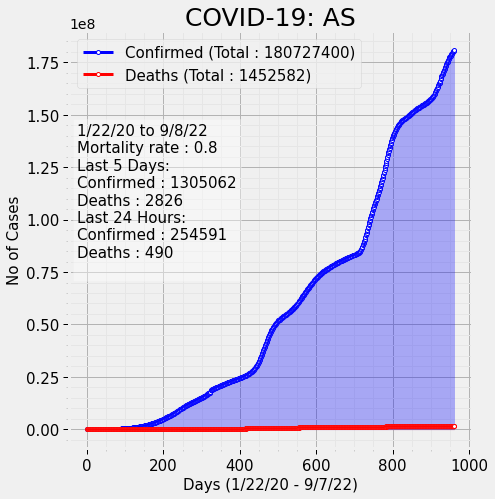

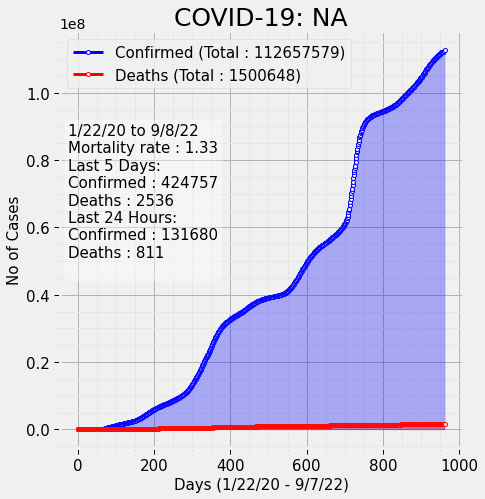

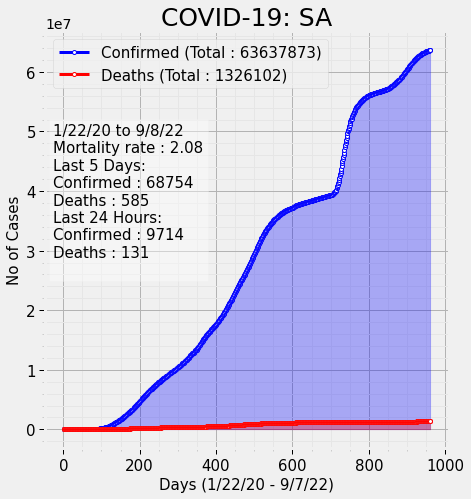

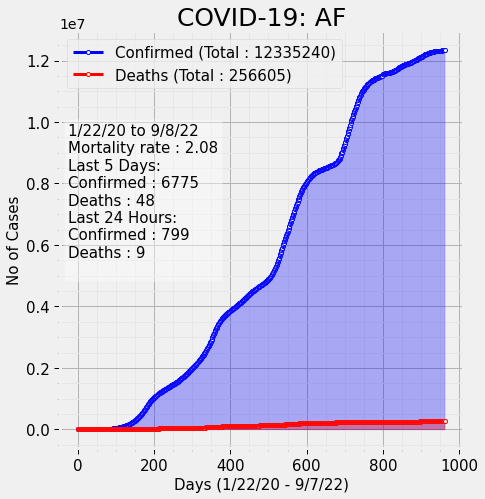

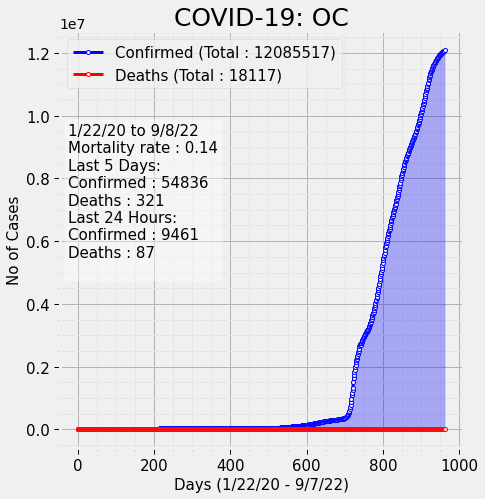

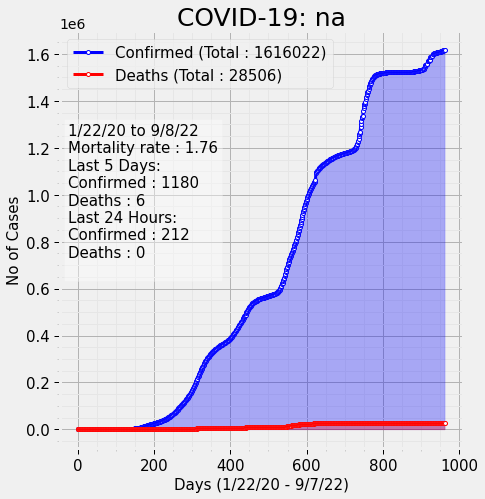

In [71]:
#setup
#Dữ liệu lấy đến ngày 953
confirmed_test = confirmed_df
deaths_test = deaths_df
#Sort theo số lượng ca nhiễm: Theo thứ tự các Châu lục
df_con_sort = df_con.sort_values(by='Confirmed',ascending=False)
Key = list(df_con_sort.index)
#Vẽ biểu đồ theo list: Key (Đã sắp xếp)
for i in Key:
    visualize_covid_cases(confirmed_test,deaths_test,i)


Biểu đồ đường tròn

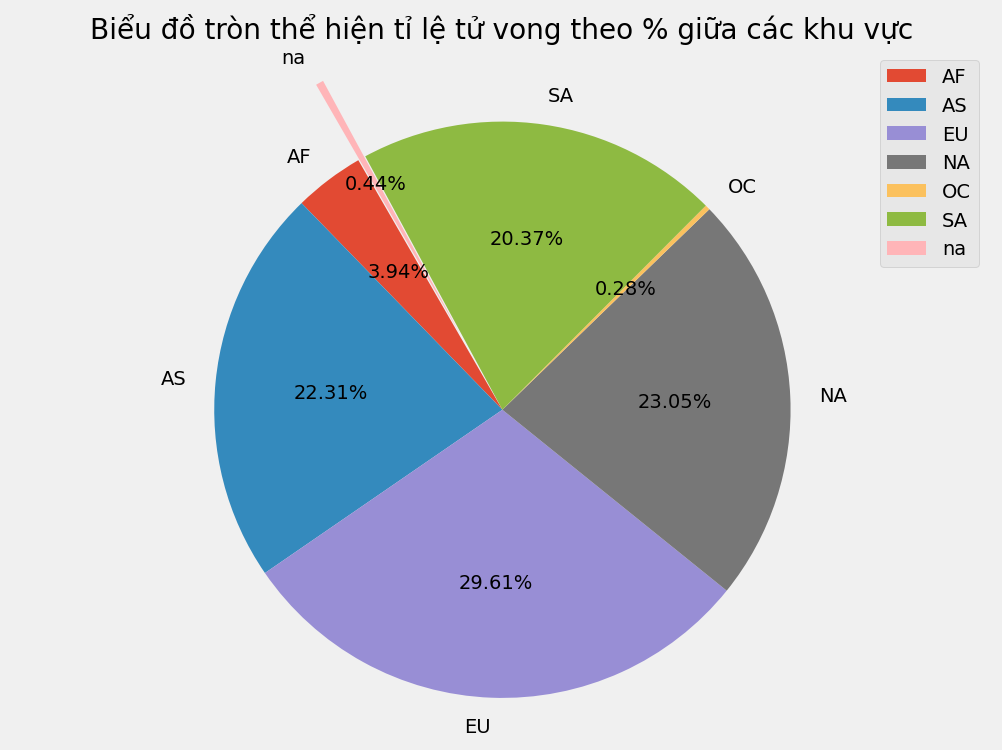

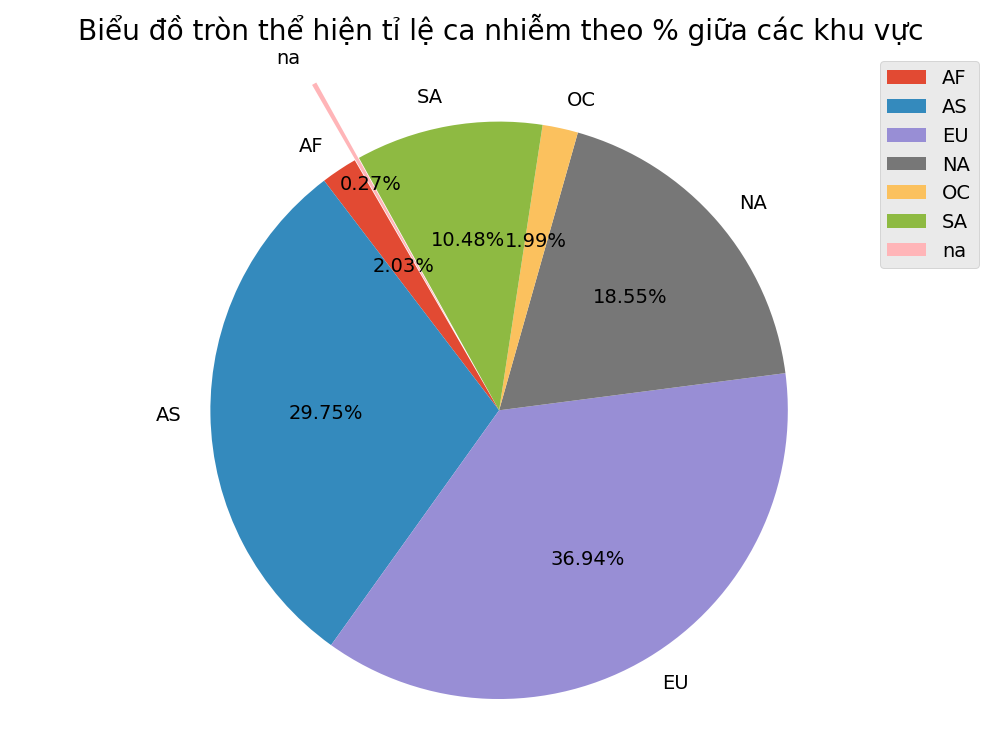

In [72]:
#Insert your code here:
#Problem 13
#Tạo 1 hàm để hỗ trợ vẽ biểu đồ tròn nhanh hơn, Nhập bảng cần vẽ như bên dưới:
def piechart(type):
    sum = df_con[type].sum()
    data = []
    if type == "Deaths":
        TV = 'tử vong'
    elif type == "Confirmed":
        TV = 'ca nhiễm'
    else:
        TV = 'phục hồi'
    for i in df_con.loc[:,type]:
        k = i 
        f = k/sum*100
        data.append(f)
    lables = list(df_con.index)
    d = data
    plt.figure(figsize=(8,6),dpi = 140)
    plt.style.use('ggplot')
    plt.pie(x = d, labels= lables,autopct = '%.2f%%',explode = [0,0,0,0,0,0,0.3],startangle=120)
    plt.title('Biểu đồ tròn thể hiện tỉ lệ '+ TV +' theo % giữa các khu vực')
    plt.axis('equal')
    plt.legend()
for i in ['Deaths','Confirmed']:
    piechart(i)

Folium

In [115]:
#Insert your code here:
#Tạo bảng con data_confirmed gồm các cột của bảng confirmed_df như bên dưới:

data_confirmed = confirmed_df[['Country/Region','Lat','Long']]
data_confirmed['Confirmed'] = confirmed_df.iloc[:,-1]
data_confirmed['Recoveries'] = recoveries_df.iloc[:,-1]
data_confirmed['Deaths'] = deaths_df.iloc[:,-1]
#Xóa đi các hàng cột không có dữ liệu:

data_confirmed.dropna(inplace=True,axis=0)
#Tạo các list tương ứng với các cột tương ứng trong bảng data_confirmed:

recoveries_data = list(data_confirmed['Recoveries'])
deaths_data = list(data_confirmed['Deaths'])
locations = data_confirmed[['Lat','Long']]
country_name = list(data_confirmed['Country/Region'])

#Normalize dữ liệu ca nhiễm để áp dụng vô biểu đồ.
values_logscale = np.log(data_confirmed['Confirmed'].values)
values = data_confirmed['Confirmed']

#Vẽ biểu đồ folium
m = folium.Map(width="%100",height="%100")
#Dùng vòng lặp for để add các CircleMarker vô biểu đồ folium
for i in range(len(locations)):
    popup_text = f'<h1 style="font-size:400%;">{str(country_name[i])}</h1> <ul style="font-size:100%,text-align:left;"><li> Ca nhiễm: {str(values.iloc[i])} </li> <li>Tử vong: {str(deaths_data[i])} </li> </ul>'
    folium.CircleMarker(location=list(locations.iloc[i,:]),radius=values_logscale[i],fill=True,popup=popup_text).add_to(m)
m



C:\Users\thanh\AppData\Local\Temp\ipykernel_38652\1938879699.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thanh\AppData\Local\Temp\ipykernel_38652\1938879699.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thanh\AppData\Local\Temp\ipykernel_38652\1938879699.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Chorolepth Map theo ca nhiễm

In [135]:
#Lấy dữ liệu geojson từ Github
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json') as response:
    countries = json.load(response)
alpha_3 = []
#Do các ID của gjson sử dụng là mã alpha_3 của quốc gia, tạo 1 list lấy kí tự alpha_3 từ cột Country/Region của bảng confirmed_df
for i in confirmed_df['Country/Region']:
    try:
        u = pc.country_name_to_country_alpha3(i)
        alpha_3.append(u)
    except:
        alpha_3.append('NaN')
#Tạo bảng df_test để vẽ đồ thị
test_dict = {'Country':alpha_3,'confirmed':list(confirmed.iloc[:,-1]) }
df_test = pd.DataFrame(test_dict)
df_test['Country_name'] = confirmed_df['Country/Region']
df_test['log_scale'] = np.log10(df_test['confirmed'])
#Vẽ đồ thị choropleth với dữ liệu là bảng df_test và bản đồ từ file geojson
fig = px.choropleth_mapbox(df_test, geojson=countries, locations='Country', color='log_scale',
                           color_continuous_scale="Blues",
                           range_color=(0, df_test['log_scale'].max()),
                           mapbox_style="carto-positron",
                           zoom=2,
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


c:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



### Nhận xét:


In [ ]:
df_nation.sort_values(by='Mortality Rate',ascending=False)
#Dữ liệu của Triều Tiên và MS Zaandam bị lỗi

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
"Korea, North",1,6,600.00
MS Zaandam,9,2,22.22
Yemen,11931,2155,18.06
Sudan,63270,4961,7.84
Syria,57114,3163,5.54
...,...,...,...
Bhutan,61233,21,0.03
Holy See,29,0,0.00
Summer Olympics 2020,865,0,0.00


In [ ]:
print('Châu lục có ca nhiễm nhiều nhất',df_con.sort_values(by='Confirmed',ascending=False).index[0])
print('Châu lục có ca tử vong nhiều nhất',df_con.sort_values(by='Deaths',ascending=False).index[0])
print('Châu lục có tỉ lệ tử vong cao nhất: ',df_con.sort_values(by='Mortality Rate',ascending=False).index[0])
print('Quốc gia có ca nhiễm cao nhất: ',df_nation.sort_values(by='Confirmed',ascending=False).index[0])
print('Quốc gia có tử vong cao nhất: ',df_nation.sort_values(by='Deaths',ascending=False).index[0])
print('Quốc gia có tỉ lệ tử vong cao nhất: ',df_nation.sort_values(by='Mortality Rate',ascending=False).index[2])

Châu lục có ca nhiễm nhiều nhất EU
Châu lục có ca tử vong nhiều nhất EU
Châu lục có tỉ lệ tử vong cao nhất:  AF
Quốc gia có ca nhiễm cao nhất:  USA
Quốc gia có tử vong cao nhất:  USA
Quốc gia có tỉ lệ tử vong cao nhất:  Yemen
